In [1]:
import numpy as np
import pandas as pd

##Visualization Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
directory = ''
file = 'pseudo_facebook.csv'
df = pd.read_csv(directory + file)

In [3]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [4]:
#Check for duplicate rows
dups = df.duplicated().tolist()
if True in dups:
    print("There's a duplicate entry somewhere")
else: 
    print("No duplicate entries")

No duplicate entries


## Find Percent Populated of Each Column

In [5]:
def populated(df, col_name):
    total = df.shape[0]
    empty = df.loc[df[col_name].isna()]
    numE = empty.shape[0]
    if numE != 0:
        print("Number of empty entries for \"{}\": {}".format(col_name, numE))
    return (1-numE/total)*100

In [6]:
for col in df.columns:
    print("\"{}\" is {:.6f}% populated.\n".format(col, populated(df, col)))

"userid" is 100.000000% populated.

"age" is 100.000000% populated.

"dob_day" is 100.000000% populated.

"dob_year" is 100.000000% populated.

"dob_month" is 100.000000% populated.

Number of empty entries for "gender": 175
"gender" is 99.823238% populated.

Number of empty entries for "tenure": 2
"tenure" is 99.997980% populated.

"friend_count" is 100.000000% populated.

"friendships_initiated" is 100.000000% populated.

"likes" is 100.000000% populated.

"likes_received" is 100.000000% populated.

"mobile_likes" is 100.000000% populated.

"mobile_likes_received" is 100.000000% populated.

"www_likes" is 100.000000% populated.

"www_likes_received" is 100.000000% populated.



## Dealing With Categorical Columns

In [7]:
print(len(df['userid'].unique()))
print(df['gender'].unique())

99003
['male' 'female' nan]


## Generate Stats For Numerical Columns

In [8]:
def outliers(numbers):
    stats = {}
    q1 = np.quantile(numbers, .25)
    q2 = np.quantile(numbers, .5)
    q3 = np.quantile(numbers, .75)
    
    IQR = q3 - q1
    lowerb = q1 - 1.5 * IQR
    upperb = q3 + 1.5 * IQR
    
    nOutlier = np.array(numbers)
    outlier = np.array(numbers)
    outlier = outlier[(outlier < lowerb) | (outlier > upperb)]
    nOutlier = nOutlier[(nOutlier > lowerb) & (nOutlier < upperb)]
    stats['min'] = min(nOutlier)
    stats['q1'] = q1
    stats['q2'] = q2
    stats['q3'] = q3
    stats['max'] = max(nOutlier)
    
    if(len(outlier) > 0):
        print('Number of outliers:', len(outlier))
        print('Outlier min and max:', min(outlier), ',', max(outlier))
    return stats

In [9]:
print(outliers(df['age'].tolist()), '\n')
print(outliers(df['dob_day'].tolist()), '\n')
print(outliers(df['dob_year'].tolist()), '\n')
df['tenure'].fillna(df['tenure'].mean(), inplace = True)
print(outliers(df['tenure'].tolist()), '\n')
print(outliers(df['friend_count'].tolist()), '\n')
print(outliers(df['friendships_initiated'].tolist()), '\n')
print(outliers(df['likes'].tolist()), '\n')
print(outliers(df['likes_received'].tolist()), '\n')
print(outliers(df['mobile_likes'].tolist()), '\n')

Number of outliers: 4314
Outlier min and max: 96 , 113
{'min': 13, 'q1': 20.0, 'q2': 28.0, 'q3': 50.0, 'max': 94} 

{'min': 1, 'q1': 7.0, 'q2': 14.0, 'q3': 22.0, 'max': 31} 

Number of outliers: 4314
Outlier min and max: 1900 , 1917
{'min': 1919, 'q1': 1963.0, 'q2': 1985.0, 'q3': 1993.0, 'max': 2000} 

Number of outliers: 8276
Outlier min and max: 1349.0 , 3139.0
{'min': 0.0, 'q1': 226.0, 'q2': 412.0, 'q3': 675.0, 'max': 1348.0} 

Number of outliers: 9128
Outlier min and max: 469 , 4923
{'min': 0, 'q1': 31.0, 'q2': 82.0, 'q3': 206.0, 'max': 468} 

Number of outliers: 9570
Outlier min and max: 268 , 4144
{'min': 0, 'q1': 17.0, 'q2': 46.0, 'q3': 117.0, 'max': 266} 

Number of outliers: 14755
Outlier min and max: 202 , 25111
{'min': 0, 'q1': 1.0, 'q2': 11.0, 'q3': 81.0, 'max': 200} 

Number of outliers: 14753
Outlier min and max: 147 , 261197
{'min': 0, 'q1': 1.0, 'q2': 8.0, 'q3': 59.0, 'max': 145} 

Number of outliers: 15412
Outlier min and max: 116 , 25111
{'min': 0, 'q1': 0.0, 'q2': 4.

In [10]:
df.loc[df['gender'] == 'male'].count()

userid                   58574
age                      58574
dob_day                  58574
dob_year                 58574
dob_month                58574
gender                   58574
tenure                   58574
friend_count             58574
friendships_initiated    58574
likes                    58574
likes_received           58574
mobile_likes             58574
mobile_likes_received    58574
www_likes                58574
www_likes_received       58574
dtype: int64

### Data Manipulation

In [11]:
# Merging dob columns into single column
df['dob'] = df['dob_year'].astype(str) + '-' + df['dob_month'].astype(str) + '-' + df['dob_day'].astype(str)
df['dob'] = pd.to_datetime(df['dob'])
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,dob
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,1999-11-19
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,1999-11-02
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,1999-11-16
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,1999-12-25
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,1999-12-04


## Statistics and Charts

### Question 1.

In [12]:
import pandas as pd
pd.set_option('display.max_columns', 999)
import numpy as np

##Visualization Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data_dir = ''
file_name = data_dir + 'pseudo_facebook.csv'
df1 = pd.read_csv(file_name)
df1

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [14]:
def outliers(numbers):
    stats = {}
    q1 = np.quantile(numbers, .25)
    q2 = np.quantile(numbers, .5)
    q3 = np.quantile(numbers, .75)
    
    IQR = q3 - q1
    lowerb = q1 - 1.5 * IQR
    upperb = q3 + 1.5 * IQR
    
    nOutlier = np.array(numbers)
    outlier = np.array(numbers)
    outlier = outlier[(outlier < lowerb) | (outlier > upperb)]
    nOutlier = nOutlier[(nOutlier > lowerb) & (nOutlier < upperb)]
    stats['min'] = min(nOutlier)
    stats['q1'] = q1
    stats['q2'] = q2
    stats['q3'] = q3
    stats['max'] = max(nOutlier)
    
    if(len(outlier) > 0):
        print('Number of outliers:', len(outlier))
        print('Outlier min and max:', min(outlier), ',', max(outlier))
    return stats

In [15]:
check = df1.loc[df1['friendships_initiated'] > df1['friend_count']]
check.shape[0]

0

In [16]:
zero= df1.loc[df1['friend_count']==0]
zero.shape[0]

1962

In [17]:
f_nozero = df1.loc[(df1['gender']=='female') & (df1['friend_count'] > 0)]
f_nozero

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
1962,1295206,14,15,1999,12,female,126.0,1,1,0,0,0,0,0,0
1963,1549189,14,20,1999,12,female,95.0,1,1,0,0,0,0,0,0
1964,1102182,14,10,1999,12,female,2.0,1,1,0,0,0,0,0,0
1967,1531762,13,1,2000,1,female,251.0,1,0,0,0,0,0,0,0
1970,1654392,13,1,2000,1,female,29.0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [18]:
m_nozero = df1.loc[(df1['gender']=='male') & (df1['friend_count'] > 0)]
m_nozero

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
1965,1433884,13,15,2000,1,male,199.0,1,1,0,0,0,0,0,0
1966,1995935,13,1,2000,1,male,264.0,1,0,0,0,0,0,0,0
1968,1430781,13,1,2000,1,male,232.0,1,1,0,0,0,0,0,0
1969,1237099,13,1,2000,1,male,52.0,1,1,0,0,0,0,0,0
1971,1812925,13,3,2000,3,male,3.0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98975,1749991,107,29,1906,12,male,328.0,3748,396,6203,19674,3667,17624,2536,2050
98985,1299870,18,16,1995,8,male,894.0,3440,1138,3835,3833,3269,2221,566,1612
98988,1729341,21,20,1992,10,male,587.0,2784,809,5177,5423,4759,3278,418,2145
98990,1902600,58,11,1955,3,male,399.0,2083,553,6236,7784,4953,4795,1283,2989


In [19]:
f_nozero['ratio'] = f_nozero['friendships_initiated']/f_nozero['friend_count']
female = f_nozero['ratio'].describe()
female

D:\Users\ct890\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    39751.000000
mean         0.559566
std          0.218936
min          0.000000
25%          0.409420
50%          0.568182
75%          0.719424
max          1.000000
Name: ratio, dtype: float64

In [20]:
outliers(f_nozero['ratio'])

{'min': 0.0,
 'q1': 0.4094197418834442,
 'q2': 0.5681818181818182,
 'q3': 0.7194244604316546,
 'max': 1.0}

In [21]:
m_nozero['ratio'] = m_nozero['friendships_initiated']/m_nozero['friend_count']
male = m_nozero['ratio'].describe()
male

D:\Users\ct890\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    57115.000000
mean         0.641765
std          0.231278
min          0.000000
25%          0.494186
50%          0.666667
75%          0.821429
max          1.000000
Name: ratio, dtype: float64

In [22]:
outliers(m_nozero['ratio'])

Number of outliers: 742
Outlier min and max: 0.0 , 0.0


{'min': 0.0043859649122807015,
 'q1': 0.4941860465116279,
 'q2': 0.6666666666666666,
 'q3': 0.8214285714285714,
 'max': 1.0}

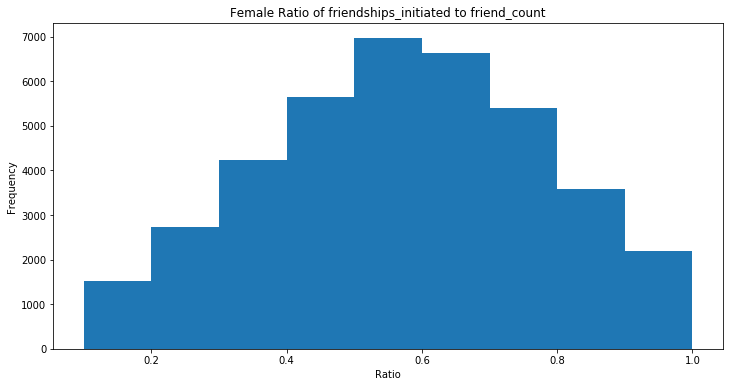

In [23]:
n_bins = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.hist(f_nozero['ratio'], bins=n_bins)
plt.gcf().set_size_inches(12, 6)
plt.title('Female Ratio of friendships_initiated to friend_count')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.show()

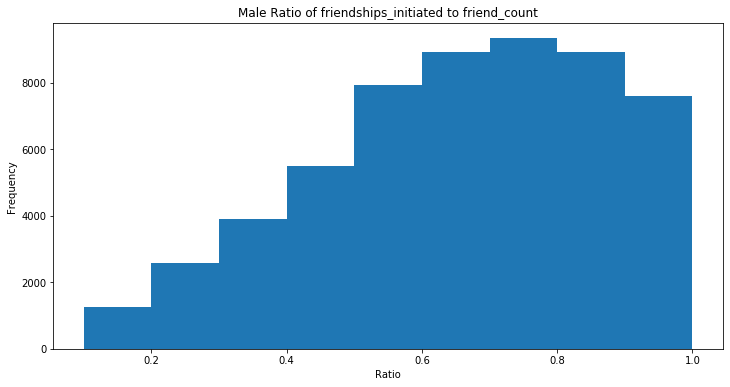

In [24]:
n_bins = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.hist(m_nozero['ratio'], bins=n_bins)
plt.gcf().set_size_inches(12, 6)
plt.title('Male Ratio of friendships_initiated to friend_count')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.show()

### Question 2.

#### Take out irrelevant data

In [25]:
df2 = df[['userid', 'age', 'mobile_likes', 'www_likes']]
df2

,userid,age,mobile_likes,www_likes
0,2094382,14,0,0
1,1192601,14,0,0
2,2083884,14,0,0
3,1203168,14,0,0
4,1733186,14,0,0
...,...,...,...,...
98998,1268299,68,3505,491
98999,1256153,18,4399,2
99000,1195943,15,11959,0
99001,1468023,23,4506,0


In [26]:
userbase = df2[(df2['mobile_likes'] != 0) | (df2['www_likes'] != 0)]
userbase.reset_index(drop = True, inplace = True)
userbase

,userid,age,mobile_likes,www_likes
0,1098638,13,0,1
1,2063204,14,0,1
2,1579594,19,0,1
3,1979672,21,0,1
4,1344831,23,0,1
...,...,...,...,...
76690,1268299,68,3505,491
76691,1256153,18,4399,2
76692,1195943,15,11959,0
76693,1468023,23,4506,0


In [27]:
print(outliers(userbase['mobile_likes'].tolist()), '\n')
print(outliers(userbase['www_likes'].tolist()), '\n')

Number of outliers: 10915
Outlier min and max: 195 , 25111
{'min': 0, 'q1': 2.0, 'q2': 13.0, 'q3': 79.0, 'max': 194} 

Number of outliers: 13147
Outlier min and max: 41 , 14865
{'min': 0, 'q1': 0.0, 'q2': 0.0, 'q3': 16.0, 'max': 39} 



In [28]:
userbase = userbase[(userbase['mobile_likes'] <= 194) & (userbase['www_likes'] < 39)]
userbase.reset_index(drop = True, inplace = True)
userbase

,userid,age,mobile_likes,www_likes
0,1098638,13,0,1
1,2063204,14,0,1
2,1579594,19,0,1
3,1979672,21,0,1
4,1344831,23,0,1
...,...,...,...,...
56297,1401648,16,177,0
56298,1107829,18,167,17
56299,1616766,68,187,12
56300,1535976,102,194,0


#### Stats for outliers out

In [29]:
def preferred_platform(df):
    if df['mobile_likes'] > df['www_likes']:
        return 'mobile'
    elif df['mobile_likes'] < df['www_likes']:
        return 'web'
    else:
        return 'both'

In [30]:
userbase['web_or_mobile'] = userbase.apply(preferred_platform, axis = 1)
userbase

D:\Users\ct890\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,userid,age,mobile_likes,www_likes,web_or_mobile
0,1098638,13,0,1,web
1,2063204,14,0,1,web
2,1579594,19,0,1,web
3,1979672,21,0,1,web
4,1344831,23,0,1,web
...,...,...,...,...,...
56297,1401648,16,177,0,mobile
56298,1107829,18,167,17,mobile
56299,1616766,68,187,12,mobile
56300,1535976,102,194,0,mobile


#### Pearson Correlation: Age vs Likes Given

In [31]:
pcorr = userbase[['age', 'mobile_likes', 'www_likes']]
pcorr.corr(method = 'pearson')

,age,mobile_likes,www_likes
age,1.000000,-0.018679,0.100351
mobile_likes,-0.018679,1.000000,-0.008113
www_likes,0.100351,-0.008113,1.000000


#### Stats Based on Groups

In [32]:
userbase.groupby('web_or_mobile').size()

web_or_mobile
both        612
mobile    42783
web       12907
dtype: int64

In [33]:
def age_groups(df):
    if df['age'] >= 10 and df['age'] < 20:
        return 10
    elif df['age'] >= 20 and df['age'] < 30:
        return 20
    elif df['age'] >= 30 and df['age'] < 40:
        return 30
    elif df['age'] >= 40 and df['age'] < 50:
        return 40
    elif df['age'] >= 50 and df['age'] < 60:
        return 50
    elif df['age'] >= 60 and df['age'] < 70:
        return 60
    elif df['age'] >= 70 and df['age'] < 80:
        return 70
    elif df['age'] >= 80 and df['age'] < 90:
        return 80
    elif df['age'] >= 90 and df['age'] < 100:
        return 90
    elif df['age'] >= 100 and df['age'] < 110:
        return 100
    elif df['age'] >= 110 and df['age'] < 120:
        return 110
    else:
        return 0

In [34]:
userbase['age_range'] = userbase.apply(age_groups, axis = 1)
userbase

D:\Users\ct890\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,userid,age,mobile_likes,www_likes,web_or_mobile,age_range
0,1098638,13,0,1,web,10
1,2063204,14,0,1,web,10
2,1579594,19,0,1,web,10
3,1979672,21,0,1,web,20
4,1344831,23,0,1,web,20
...,...,...,...,...,...,...
56297,1401648,16,177,0,mobile,10
56298,1107829,18,167,17,mobile,10
56299,1616766,68,187,12,mobile,60
56300,1535976,102,194,0,mobile,100


In [35]:
by_age = userbase.groupby('age_range').agg(np.mean)
by_age = by_age[['mobile_likes', 'www_likes']]
by_age['web_or_mobile'] = by_age.apply(preferred_platform, axis = 1)
by_age

,mobile_likes,www_likes,web_or_mobile
age_range,,,
10,26.852086,3.854539,mobile
20,26.393956,2.847003,mobile
30,28.373635,2.790441,mobile
40,28.169028,3.533426,mobile
50,26.687206,4.878462,mobile
60,20.838694,5.515582,mobile
70,15.599711,6.256503,mobile
80,18.911824,5.991984,mobile
90,28.354452,5.457192,mobile


#### Chart Generation

In [36]:
by_age.reset_index(inplace = True)
by_age

,age_range,mobile_likes,www_likes,web_or_mobile
0,10,26.852086,3.854539,mobile
1,20,26.393956,2.847003,mobile
2,30,28.373635,2.790441,mobile
3,40,28.169028,3.533426,mobile
4,50,26.687206,4.878462,mobile
5,60,20.838694,5.515582,mobile
6,70,15.599711,6.256503,mobile
7,80,18.911824,5.991984,mobile
8,90,28.354452,5.457192,mobile
9,100,28.478934,5.132846,mobile


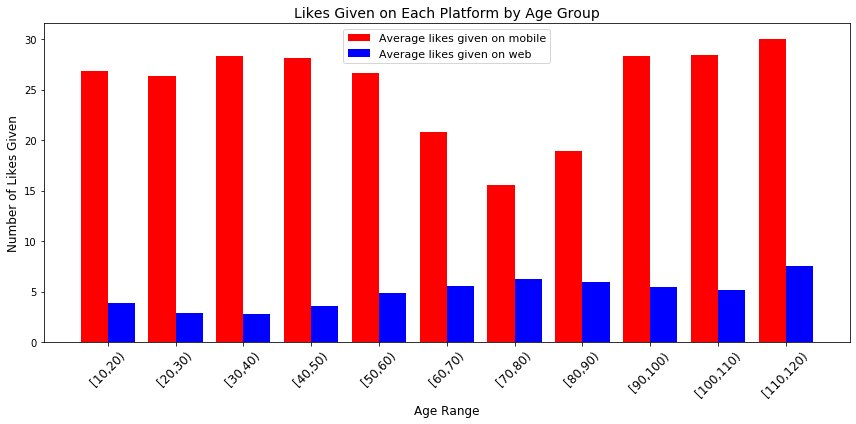

In [49]:
label_locations = np.arange(by_age.shape[0])
labs = ['[10,20)', '[20,30)', '[30,40)', '[40,50)', '[50,60)', '[60,70)', '[70,80)', '[80,90)', '[90,100)', '[100,110)', '[110,120)']
w = 0.4
plt.bar(label_locations - w/2, by_age['mobile_likes'], width=w, label='Average likes given on mobile', color='red')
plt.bar(label_locations + w/2, by_age['www_likes'], width=w, label='Average likes given on web', color='blue')
plt.gcf().set_size_inches(12, 6)
plt.title('Likes Given on Each Platform by Age Group', fontsize = 14)
plt.xlabel('Age Range', fontsize = 12)
plt.ylabel('Number of Likes Given', fontsize = 12)
plt.xticks(label_locations, labels=labs, rotation=45, fontsize = 12)
plt.legend(fontsize = 11)
plt.tight_layout()
plt.show()

### Question 3.

In [38]:
import numpy as np
import pandas as pd

directory = ''
file = 'pseudo_facebook.csv'
df3 = pd.read_csv(file)

In [39]:
#Remove outliers
df3 = df3[df3["likes"] < 202]
df3 = df3[ df3["likes_received"] < 147]
df3 = df3[df3["friendships_initiated"] < 268]
df3 = df3[df3["friend_count"] < 469]

In [40]:
#Calculate success 
df3['success'] = (df3['likes'] + df3["friend_count"]) / (df3["likes_received"] + df3["friendships_initiated"])

In [41]:
#Remove infinity and NaN
df3['success'] = df3["success"].replace([np.inf, -np.inf], np.nan)
df3 = df3.dropna(subset=['success'])

In [42]:
#Create tiers based on tenure (account age)
bin_labels = ["Noob", "Rookie", "Veteran", "Early Adopter"]
df3["tier"], bin_edges = pd.qcut(df3['tenure'], q=4, labels=bin_labels, retbins=True)

In [43]:
#Create new DataFrame for desired results
results = pd.DataFrame(columns=['avg_success', 'tenure', 'tier'])
for label in bin_labels:
    label_df3 = df3.loc[df3['tier'] == label]
    results = results.append({'avg_success':label_df3['success'].mean(), 'tier':label, 'tenure':label_df3['tenure'].mean()}, ignore_index=True)

In [44]:
#Generate pearson correlation
corr = results.corr(method="pearson")

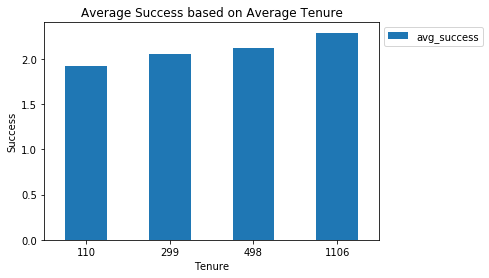

In [45]:
# Plot chart
x = np.arange(len(results['tenure']))  # the label locations
ax = results.plot.bar(x='tenure', y='avg_success', rot=0)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Success')
ax.set_title('Average Success based on Average Tenure')
ax.set_xticks(x)
ax.set_xticklabels(results['tenure'].astype('int64'))
ax.set_xlabel('Tenure')

ax.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)